In [2]:
import os
import struct
import numpy as np


def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte'% kind)
    
    images_path = os.path.join(path,'%s-images-idx3-ubyte'% kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
        lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
        imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels

X_train, y_train = load_mnist('mnist', 'train')
print 'Row: %d, Column: %d' %(X_train.shape[0], X_train.shape[1])

X_test, y_test = load_mnist('mnist', 't10k')
print 'Row: %d, Column: %d' %(X_test.shape[0], X_test.shape[1])

Row: 60000, Column: 784
Row: 10000, Column: 784


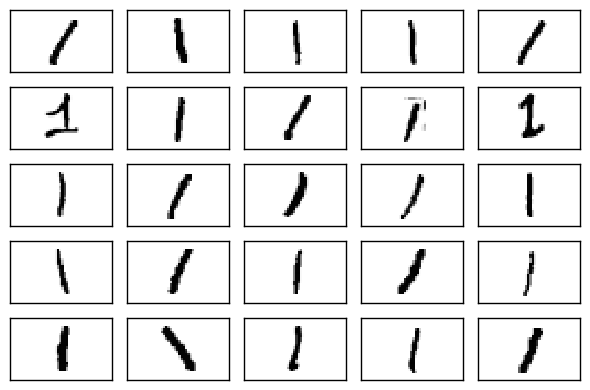

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex = True, sharey = True, )

ax = ax.flatten()
for i in range(25):
    img = X_train[y_train==1][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [2]:
np.savetxt('train_img.csv', X_train, fmt='%i', delimiter=',')
np.savetxt('train_labels.csv', y_train, fmt='%i', delimiter=',')
np.savetxt('test_img.csv', X_test, fmt='%i', delimiter=',')
np.savetxt('test_labels.csv', y_test, fmt='%i', delimiter=',')

In [3]:
X_train = np.genfromtxt('train_img.csv', dtype=int, delimiter=',')
y_train = np.genfromtxt('train_labels.csv', dtype=int, delimiter=',')
X_test = np.genfromtxt('test_img.csv', dtype=int, delimiter=',')
y_test = np.genfromtxt('test_labels.csv', dtype=int, delimiter=',')

In [ ]:

from neuralnet import NeuralNetMLP
%reload_ext autoreload
%autoreload 2

nn = NeuralNetMLP(n_output=10, 
                  n_features=X_train.shape[1],
                  n_hidden=100,
                  l2=0.1,
                  l1=0.01,
                  epochs=1000,
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  shuffle=True,
                  minibatches=100,
                  random_state=1 )

nn.fit(X_train, y_train, print_progress = True)

Epoch: 7/1000

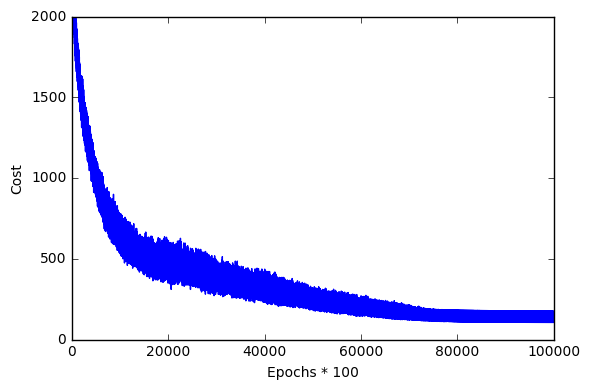

In [11]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 100')
plt.tight_layout()
plt.show()

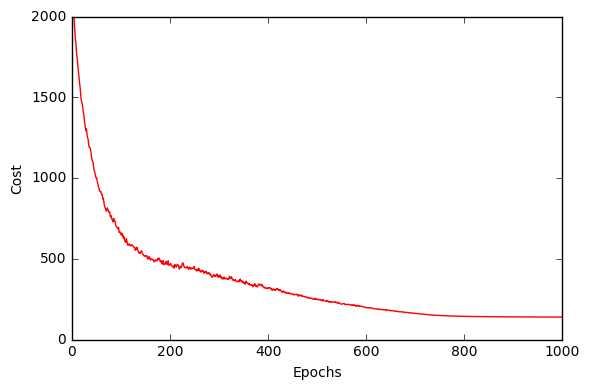

In [12]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[idx]) for idx in batches]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 2000])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()

In [8]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis = 0)*1.0/(X_train.shape[0]*1.0)
print 'Training accuracy: %.2f%%' % (acc * 100)

Training accuracy: 97.06%


In [9]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred, axis = 0)*1.0)/(X_test.shape[0]*1.0)
print 'Testing accuracy: %.2f%%' % (acc * 100)

Testing accuracy: 96.28%


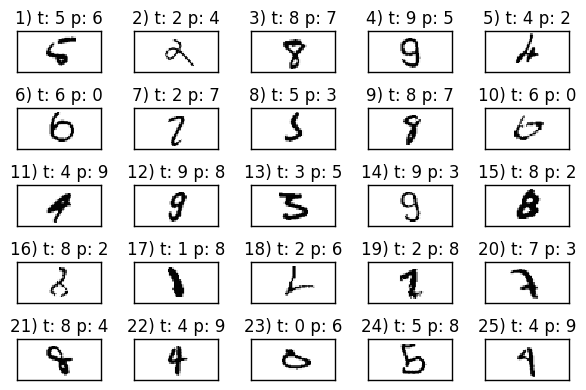

In [6]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex=True, sharey=True)

ax = ax.flatten()

for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation = 'nearest')
    ax[i].set_title('%d) t: %d p: %d' %(i+1, correct_lab[i], miscl_lab[i]))
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()